# 포트폴리오 리스크 최소화 문제

### 0. 문제상황 및 조건
<hr>

#### 0.1. 문제상황

전체 자산의 w를 30% 리스크 자산에 투자, (1-w)를 10% 리스크 자산에 투자할때
1. 전체 포트폴리오의 에러를 RMSE로 계산하라
2. 리스크를 최소화하는 w를 구하라.
3. correlation이 +0.5, -0.5, +1, -1, ... 일때 w를 구하라.
4. 어떨 때 가장 유리한가? 

#### 0.2. 전제: 리스크 = 표준편차

따라서 리스크 30%인 자산의 표준편차는 0.3(분산은 0.09)이고, 리스크 10%인 자산의 표준편차는 0.1(분산은 0.01)이다. 

#### 0.3. 변수 문자를 도입하여 문제의 주어진 조건 기술

- $X_1$ : 리스크 30%인 자산, 자산1을 나타내는 확률 변수(random variable)
- $X_2$ : 리스크 10%인 자산, 자산2를 나타내는 확률 변수(random variable)
- $w$ : 자산1에 투자하는 비율
- $\sigma_1 = 0.3 $ : $X_1$의 표준편차, 즉 자산1의 리스크
- $\sigma_2 = 0.1 $ : $X_2$의 표준편차, 즉 자산2의 리스크
- $\rho$ : 자산1과 자산2의 correlation $( -1 \leq \rho \leq 1 )$

#### 0.4. 두 확률변수 $X_1, X_2$ 상관계수(correlation) $\rho$의 정의

$$ \rho \equiv \frac{\text{Cov}(X_1, X_2)}{\sigma_1 \sigma_2} $$

### 1. 전체 포트폴리오의 에러를 RMSE로 계산
<hr>

우선 MSE를 먼저 계산한다.

\begin{align} 
\text{MSE} & = \text{Var}(wX_1 + (1-w)X_2) \\
& = w^2 \text{Var}(X_1) + (1-w)^2 \text{Var}(X_2) + 2w(1-w)\text{Cov}(X_1, X_2) \\
& = w^2 \sigma_1^2 + (1-w)^2 \sigma_2^2 + 2w(1-w)\sigma_1\sigma_2\rho \\
& = 0.09w^2 + 0.01(1-w)^2 + 0.06w(1-w)\rho \\
& = (0.1-0.06\rho)w^2 + (-0.02+0.06\rho)w +0.01 \\
\end{align} 


correlation $\rho$는 통상적으로 out-of-control 파라미터라고 교수님께서 언급하셨으므로, RMSE는 w에 대해 2차 다항함수라 할 수 있다. RMSE가 w에 대한 함수라는 것을 명시하기 위해 이하 다음과 같이 표현하도록 한다. 


> $$  \text{RMSE}(w) = \sqrt{(0.1-0.06\rho)w^2 + (-0.02+0.06\rho)w +0.01} $$ 

### 2. 리스크를 최소화하는 자산 투자 비율 $w$
<hr>

주어진 투자 방식의 리스크는 $\text{RMSE}(w)$로 측정된다. 이때 $\rho$ 는 $( -1 \leq \rho \leq 1 )$ 이므로 언제나 아래로 볼록한 함수, 즉 극소값을 갖는 함수이다. 따라서 $\text{RMSE}(w) $를 $w$에 대해 미분하여 리스크를 최소화하는 w를 구한다.

$$ \frac{d}{dw}\text{RMSE}(w) = \frac{(0.1-0.06\rho)w-(0.01-0.03\rho)}{\sqrt{(0.1-0.06\rho)w^2 + (-0.02+0.06\rho)w +0.01}} = 0$$

> $$ w = \frac{0.1-0.3\rho}{1-0.6\rho} $$

### 3. $\rho = -1, -\frac{1}{2}, 0, \frac{1}{2}, 1, ... $일때 자산 투자 비율 $w$
<hr>

단순 반복 계산이므로 Python 코드를 이용하여 계산한다.

In [14]:
x_list = [-1, -0.5, 0, 0.5, 1]
w_list = []
for x in x_list:
    w = (0.1-0.3*x) / (1-0.6*x)
    w_list.append(w)
w_list

[0.25, 0.1923076923076923, 0.1, -0.07142857142857141, -0.49999999999999994]

##### 3.1. ($\, \rho = -1 \,$) 정반대로 움직이는 두 자산에 투자할 경우, 리스크를 최소화하는 투자 비율

$$ w = 0.25 $$

자산1에 25% 투자, 자산2에 75% 투자해야 리스크가 최소화된다.

##### 3.2. ($\, \rho = -\frac{1}{2} \,$) 절반 정도 반대로 움직이는 두 자산에 투자할 경우, 리스크를 최소화하는 투자 비율

$$ w = 0.19 $$

자산1에 19% 투자, 자산2에 81% 투자해야 리스크가 최소화된다.

##### 3.3. ($\, \rho = 0 \,$) 서로 무관하게 움직이는 두 자산에 투자할 경우, 리스크를 최소화하는 투자 비율

$$ w = 0.1 $$

자산1에 10% 투자, 자산2에 90% 투자해야 리스크가 최소화된다.

##### 3.4. ($\, \rho = \frac{1}{2} \,$) 동반 상승-동반 하락, 비슷하게 움직이는 두 자산에 투자할 경우 리스크를 최소화하는 투자 비율

$$ w = -0.07 $$

자산1에 -7% 비율로 투자, 자산2에 107% 투자해야 리스크가 최소화된다. 이 경우 해석은 다음과 같이 할 수 있다
- 리스크가 30%인 자산1은 자산2 대비 위험 자산인데, 이 경우 리스크가 10%인 자산1에 투자하지 않고 자산2(안전자산)에 100% 투자하는 것이 리스크를 최소화할 수 있다. "안전자산에만 투자하라!"
- 만약 상승-하락의 비율을 완벽히(100%) 반영하는 자산1의 공매도 상품과 자산2의 레버리지 투자 상품이 있을 경우, 투자금의 7% 만큼을 자산1 공매도, 투자금의 107%만큼을 자산2 레버리지 투자하는 것으로 리스크를 최소화할 수 있다.

##### 3.5. ($\, \rho = 1 \,$) 동일한 비율로 상승-하락하는 두 자산에 투자할 경우 리스크를 최소화하는 투자 비율

$$ w = -0.5 $$

자산1에 -50% 비율로 투자, 자산2에 150% 투자해야 리스크가 최소화된다. 이 경우 해석은 다음과 같이 할 수 있다
- 리스크가 30%인 자산1은 자산2 대비 위험 자산인데, 이 경우 리스크가 10%인 자산1에 투자하지 않고 자산2에 100% 투자하는 것이 리스크를 최소화할 수 있다. "똑같은 비율로 상승 하락하는 두 투자 자산이 있는 경우, 더더욱 안전자산에만 투자하라!"
- 만약 상승-하락의 비율을 완벽히(100%) 반영하는 자산1의 공매도 상품과 자산2의 레버리지 투자 상품이 있을 경우, 투자금의 50% 만큼을 자산1 공매도, 투자금의 150%만큼을 자산2 레버리지 투자하는 것으로 리스크를 최소화할 수 있다.

##### 3.6. 위의 결과들로부터, $\rho$가 특정한 지점부터 투자 비율 $w$ 0보다 작아진다는 것을 알 수 있다. 이때의 $\rho$

$$ w = \frac{0.1-0.3\rho}{1-0.6\rho} = 0 $$

> $$ \rho = 1/3 $$

상관 계수가 1/3 인 경우부터, 즉 1/3 정도로 비슷하게 움직이는 위험 자산과 안전 자산에 분산 투자할 경우 안전 자산에 100% 투자하는 것이 리스크를 최소화할 수 있다. 따라서 **두 투자 자산의 상관 계수가 1/3보다 커지는 경우 안전자산에만 100% 투자를 해야 리스크를 최소화할 수 있다.** 

### 4. 가장 유리한 경우 탐색
<hr>

몇 가지 $\rho$ 값에 대해 리스크 함수를 그려보자. 

##### RMSE 함수를 구현한 코드 

In [63]:
def RMSE(rho, domain):
    fw_list = []
    for w in domain:
        fw = math.sqrt((0.1-0.06*rho)*w**2 + (-0.02+0.06*rho)*w +0.01)
        fw_list.append(fw)
    return fw_list

In [84]:
w_domain = np.linspace(-.2, 1, num=50)

##### $\rho = -1, -1/2, 0, 1/3, 1/2$ 각각에 대해 $ \text{RMSE}(w)$ plot 그리기 

In [85]:
f1 = RMSE(-1, w_domain)
f2 = RMSE(-0.5, w_domain)
f3 = RMSE(0, w_domain)
f4 = RMSE(1/3, w_domain)
f5 = RMSE(1/2, w_domain)

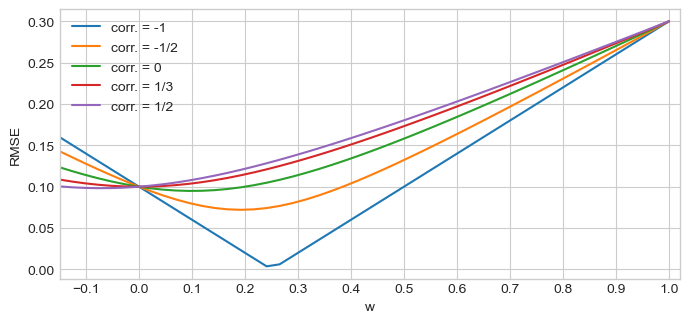

In [99]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(8,3.5))
plt.plot(w_domain, f1, label="corr. = -1")
plt.plot(w_domain, f2, label="corr. = -1/2")
plt.plot(w_domain, f3, label="corr. = 0")
plt.plot(w_domain, f4, label="corr. = 1/3")
plt.plot(w_domain, f5, label="corr. = 1/2")

plt.xlabel('w')
plt.ylabel('RMSE')
plt.xticks(np.arange(-0.2, 1.05, 0.1))
plt.xlim([-0.15, 1.02])
plt.legend()
plt.show()

In [93]:
minimums = [np.min(f1), np.min(f2), np.min(f3), np.min(f4), np.min(f5)]
minimums

[0.003673469387755413,
 0.07205786928883835,
 0.09488808375212754,
 0.10000666366802345,
 0.09821140997645174]

각 $\rho$에 대해 최소화된 $\text{RMSE}$, 즉 리스크의 크기는 다음과 같다. 

$$ \text{RMSE}_{min} = 
\begin{cases}
0.004 & \text{at} \quad w = 0.25 \quad \cdots \quad (\rho = -1) \\
0.072 & \text{at} \quad w = 0.19 \quad \cdots \quad (\rho = -0.5) \\
0.095 & \text{at} \quad w = 0.1 \quad \cdots \quad (\rho = 0) \\
0.100 & \text{at} \quad w = 0 \quad \cdots \quad (\rho = 1/3) \\
\end{cases}
$$

> 투자에 가장 유리한 상황은 리스크가 최소화되는 투자 비율을 선택하는 것이다. 즉, 각 그래프에서 RMSE가 최소가 되는 $w$ 값으로 자산1과 자산2에 분산 투자하는 것이다. 